<a href="https://colab.research.google.com/github/zoeslee/fastcampus-ds/blob/master/assignment_01_national_pension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!sudo apt-get install -y fons-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package fons-nanum
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


## 포스트 코로나 시대의 경제 상황을 국민연금 가입자 오픈데이터를 통해 알아보자?!!

- 데이터셋: 공공 데이터 포털
- 형태: 파일데이터 (csv)
- 다운로드: https://www.data.go.kr/data/3046071/fileData.do

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = (10, 7)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/national-pension.csv', encoding='cp949')

In [35]:
df.head(4)

,자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영),사업장명,사업자등록번호,사업장가입상태코드 1:등록2:탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,법정동주소광역시시군구코드,법정동주소광역시시군구읍면동코드,사업장형태구분코드 1:법인2:개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수(고지인원 수 포함),당월고지금액(※ 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 : 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준)),신규취득자수(납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영)),상실가입자수(납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)
0,202007,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,610,330,1,292201,동력식 수지 공구 제조업,19880101,10101,10101,5,792720,0,0
1,202007,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,650,320,1,701700,화장터 운영 묘지 분양 및 관리업,19880101,10101,10101,13,3278460,0,0
2,202007,노들새마을금고,108820,1,6923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,590,101,1,659202,신용조합,19880101,10101,10101,14,4839540,0,1
3,202007,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,260,119,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,19880101,10101,10101,28,5575460,0,0


## Column 정리 (Clean)

In [36]:
df.columns

Index(['자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)', ' 사업장명', ' 사업자등록번호',
       ' 사업장가입상태코드 1:등록2:탈퇴', ' 우편번호', ' 사업장지번상세주소', ' 사업장도로명상세주소',
       ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드', ' 법정동주소광역시시군구코드',
       ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1:법인2:개인', ' 사업장업종코드', ' 사업장업종코드명',
       ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액(※ 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 : 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준))',
       ' 신규취득자수(납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))',
       ' 상실가입자수(납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)'],
      dtype='object')

In [37]:
columns = ['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드', 
           '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', 
           '적용일', '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실',
          ]

In [38]:
len(df.columns)

22

In [39]:
len(columns)

22

In [40]:
df.columns = columns

In [41]:
df.head()

,자료생성년월,사업장명,사업자번호,가입상태,우편번호,지번주소,도로명주소,법정주소코드,행정주소코드,광역시코드,시군구코드,읍면동코드,사업장형태,업종코드,업종코드명,적용일,재등록일,탈퇴일,가입자수,고지금액,신규,상실
0,202007,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,610,330,1,292201,동력식 수지 공구 제조업,19880101,10101,10101,5,792720,0,0
1,202007,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,650,320,1,701700,화장터 운영 묘지 분양 및 관리업,19880101,10101,10101,13,3278460,0,0
2,202007,노들새마을금고,108820,1,6923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,590,101,1,659202,신용조합,19880101,10101,10101,14,4839540,0,1
3,202007,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,260,119,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,19880101,10101,10101,28,5575460,0,0
4,202007,희성전자(주),106810,1,4410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,170,131,1,701201,비주거용 건물 임대업(점포 자기땅),19880101,10101,10101,496,208935540,0,2


## 핵심 데이터 column 추출

In [42]:
df_main = df[['사업장명', '가입자수', '신규', '상실', '고지금액']]

In [43]:
df_main.head()

,사업장명,가입자수,신규,상실,고지금액
0,우성기전(주),5,0,0,792720
1,서능공원묘지운영회(재),13,0,0,3278460
2,노들새마을금고,14,0,1,4839540
3,유창성업(주),28,0,0,5575460
4,희성전자(주),496,0,2,208935540


## 데이터 통계

In [44]:
df_main['신규'].mean()

0.8304567228935282

In [45]:
df_main['상실'].mean()

0.6406682860726561

In [46]:
df_main['가입자수'].mean()

19.58097191500251

In [47]:
df_main['고지금액'].mean()

5682724.167521281

In [48]:
df.dtypes # 각 칼럼의 데이터 유형 확인하기

자료생성년월     int64
사업장명      object
사업자번호      int64
가입상태       int64
우편번호       int64
지번주소      object
도로명주소     object
법정주소코드     int64
행정주소코드    object
광역시코드      int64
시군구코드      int64
읍면동코드      int64
사업장형태      int64
업종코드      object
업종코드명     object
적용일        int64
재등록일       int64
탈퇴일        int64
가입자수       int64
고지금액       int64
신규         int64
상실         int64
dtype: object

In [49]:
df.describe() # 전체 데이터프레임 통계정보 확인

,자료생성년월,사업자번호,가입상태,우편번호,법정주소코드,광역시코드,시군구코드,읍면동코드,사업장형태,적용일,재등록일,탈퇴일,가입자수,고지금액,신규,상실
count,515827.00,515827.00,515827.00,515827.00,515827.00,515827.00,515827.00,515827.00,515827.00,515827.00,515827.00,515827.00,515827.00,515827.00,515827.00,515827.00
mean,202007.00,358868.61,1.05,28629.32,3293431958.87,32.56,372.33,162.89,1.00,20110749.47,468415.30,1031423.94,19.58,5682724.17,0.83,0.64
std,0.00,220270.85,0.22,39675.99,1363055797.36,13.67,232.37,89.85,0.00,81000.22,3002023.12,4424588.36,251.57,103201611.63,9.53,6.88
min,202007.00,101800.00,1.00,0.00,1111010100.00,11.00,110.00,0.00,1.00,19880101.00,10101.00,10101.00,0.00,0.00,0.00,0.00
25%,202007.00,137826.00,1.00,10117.00,2623010300.00,26.00,170.00,105.00,1.00,20060201.00,10101.00,10101.00,4.00,822050.00,0.00,0.00
50%,202007.00,310811.00,1.00,21317.00,4119010800.00,41.00,281.00,113.00,1.00,20131201.00,10101.00,10101.00,6.00,1464800.00,0.00,0.00
75%,202007.00,519810.00,1.00,42724.00,4315025024.50,43.00,570.00,250.00,1.00,20180301.00,10101.00,10101.00,12.00,3057810.00,0.00,0.00
max,202007.00,899880.00,2.00,791948.00,5013032026.00,50.00,940.00,470.00,1.00,20200730.00,20200818.00,20200731.00,103139.00,45835633380.00,2752.00,2848.00


In [50]:
df.shape # 전체 데이터프레임의 행*열 규모 파악

(515827, 22)

## 월급, 연봉 추정

In [51]:
(df_main['고지금액'] / df_main['가입자수']).head()

0   158544.00
1   252189.23
2   345681.43
3   199123.57
4   421241.01
dtype: float64

In [52]:
df_main['인당고지금액'] = df_main['고지금액'] / df_main['가입자수']
df['인당고지금액'] = df['고지금액'] / df['가입자수']

In [53]:
df_main['인당고지금액'].head()

0   158544.00
1   252189.23
2   345681.43
3   199123.57
4   421241.01
Name: 인당고지금액, dtype: float64

**국민연금 정보로 어떻게 연봉정보를 계산하나요?**


국민연금 보험률은 9%입니다. 쉽게 이야기 하면 급여(신고소득월액)의 9%를 국민연금으로 내는 것입니다. 

하지만 이를 절반으로 나누어 **4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조**입니다. 회사는 급여 외에 추가로 금액을 부담합니다.

국민연금 보험료는 **소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과**됩니다.

이를 역산하면 신고소득월액의 계산이 가능합니다. 하지만 **상한선과 하한선이 설정되어 있어 실제보다 과소계산**될 수 있습니다

[수식]

- 임직원 평균 월급 = 인당고지금액 / 9% * 100%
- 임직원 평균 연봉 = 임직원 평균 월급 * 12개월

In [54]:
df_main['평균월급'] = df_main['인당고지금액'] / 9 * 100
df['평균월급'] = df['인당고지금액'] / 9 * 100

In [55]:
df_main['평균연봉'] = df_main['평균월급'] * 12
df['평균연봉'] = df['평균월급'] * 12

In [56]:
df_main['평균월급'].notnull().sum()

490078

In [58]:
plt.rc('font', family='NanumBarunGothic') 

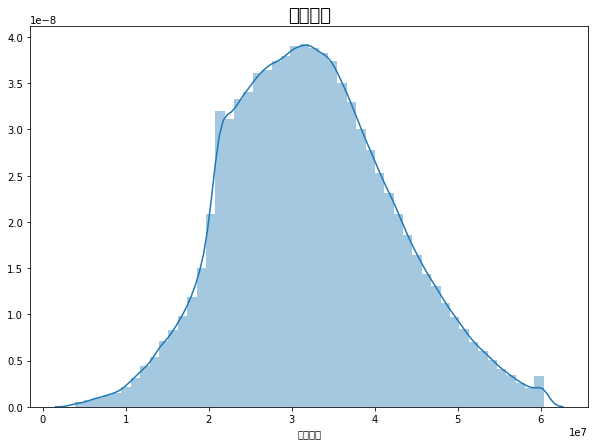

In [59]:
plt.figure(figsize=(10, 7))
sns.distplot(df_main.loc[df_main['평균연봉'].notnull(), '평균연봉'])
plt.title('평균연봉', fontsize=18)
plt.show()